[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.513

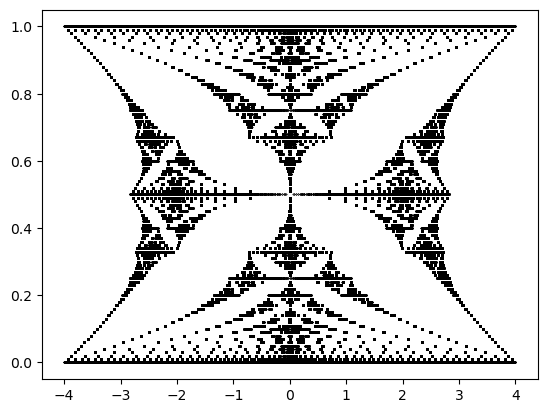

In [8]:
import numpy as np
import matplotlib.pyplot as plt


size=300# Size of lattice along x direction

alpharr=np.zeros(101)

for i in range(1,101):
		alpharr[i]=i/100.0
		
print (alpharr)


nu_arr=np.linspace(0,2*np.pi,50)
print (nu_arr)

#Periodic boundary conditions
def pbc(i):
	if i==(size):
		return(0)
	elif i==-1:
		return(size-1)
	else:
		return(i)



def Hamiltonian(alpha,nu):
	H=np.zeros((size,size))
	for i in range(0,size):
		#H[i,i]=2*np.cos((2*np.pi*(i+1)*alpha)-nu)+2.0*np.cos(2*np.pi*(i+1)/np.sqrt(7))
	    H[i,i]=2*np.cos((2*np.pi*(i+1)*alpha)-nu)
	    H[i,pbc(i+1)]=1.0
	    H[i,pbc(i-1)]=1.0
	
	return(H)


y_vals=np.zeros(size)
x_vals=np.zeros(size)

for alpha in alpharr:
	y_vals[:]=alpha
	for nu in nu_arr:  #Diagonalze Hamiltonaian. Plot energies for each alpha ..(\eps,\alpha)
		x_vals=np.linalg.eigvalsh(Hamiltonian(alpha,nu))
		plt.plot(x_vals,y_vals,'ko',markersize=0.2)

plt.show()
	


	

In [93]:
import numpy as np
import scipy as sp  
import matplotlib.pyplot as plt

In [94]:
def HA(n, Lx, ky):
    """  This function constructs the full Hamiltonian for all A bonds on the lattice
    
        HA1 = Bonds A: (4x+3, y+1) <--> (4x+4, y),  x' = 4x+3,   x = 4x + 4 
        HA2 = Bonds A: (4x+1, y) <--> (4x+2, y),  x' = 4x+1,   x = 4x + 2
        HA = HA1 + HA2"""
        
    #creates an array with all values of the lattice sites that construct the A bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(3, 4 * n, 4)  # 4x + 3
    B = np.arange(4, 4 * n + 1, 4)  # 4x + 4
    C = np.arange(1, 4 * n, 4)  # 4x + 1
    D = np.arange(2, 4 * n + 1, 4)  # 4x + 2


    HA1 = np.zeros((Lx, Lx), dtype=complex)
    HA2 = np.zeros((Lx, Lx), dtype=complex)

    HA1[A - 1, B - 1] = np.exp(1j * ky)
    HA1[B - 1, A - 1] = np.exp(-1j * ky)
    HA2[C - 1, D - 1] = 1
    HA2[D - 1, C - 1] = 1
    HA = HA1 + HA2
    return HA


def HB(n, Lx, ky):
    """  This function constructs the full Hamiltonian for all B bonds on the lattice
    
        HB1 = Bonds B: (4x+2, y+1) <--> (4x+1, y), x' = 4x + 2,   x = 4x + 1 
        HB2 = Bonds B: (4x+3, y) <--> (4x+4, y), x' = 4x + 3,   x = 4x + 4
        HB = HB1 + HB2 """

    #creates an array with all values of the lattice sites that construct the B bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(2, 4 * n, 4)  # 4x + 2
    B = np.arange(1, 4 * n, 4)  # 4x + 1
    C = np.arange(3, 4 * n, 4)  # 4x + 3
    D = np.arange(4, 4 * n + 1, 4)  # 4x + 4

    HB1 = np.zeros((Lx, Lx), dtype=complex)
    HB2 = np.zeros((Lx, Lx), dtype=complex)

    HB1[A - 1, B - 1] = np.exp(1j * ky)
    HB1[B - 1, A - 1] = np.exp(-1j * ky)
    HB2[C - 1, D - 1] = 1
    HB2[D - 1, C - 1] = 1

    HB = HB1 + HB2

    return HB


def HC(n, Lx):
    
    """ This function constructs the full Hamiltonian for all C bonds on the lattice
    
        HC1 = Bonds C: (4x, y) <--> (4x+1, y ), x' = 4x,   x = 4x + 1
        HC2 = Bonds C: (4x+2, y) <--> (4x+3, y), x' = 4x + 2,   x = 4x + 3
        HC = HC1 + HC2  """

    #creates an array with all values of the lattice sites that construct the C bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(4, 4 * n, 4)  # 4x
    B = np.arange(5, 4 * n + 1, 4)  # 4x + 1
    C = np.arange(2, 4 * n , 4)  # 4x + 2
    D = np.arange(3, 4 * n , 4)  # 4x + 3

    HC1 = np.zeros((Lx, Lx), dtype=complex)
    HC2 = np.zeros((Lx, Lx), dtype=complex)
  
    HC1[A - 1, B - 1] = 1
    HC1[B - 1, A - 1] = 1
    HC2[C - 1, D - 1] = 1
    HC2[D - 1, C - 1] = 1

    HC = (HC1 + HC2) 

    return HC

In [95]:
def floquet_operator(n, Lx, ky, t,noise):
    """ This function constructs the full Floquet operator for the lattice """
    
    HA1 = HA(n, Lx, ky)
    HB1 = HB(n, Lx, ky)
    HC1 = HC(n, Lx)
    
    #creates the full Floquet operator
    Floquet = np.exp(-1j*t*(1 + noise[0][0])*HA1/3)@np.exp(-1j*t*(1 + noise[0][1])*HB1/3)@np.exp(-1j*t*(1 + noise[0][2])*HC1/3)
    
    return Floquet

In [96]:
n =13   # Number of unit lattices 
Lx = 4*n        # Number of lattice sites along the x direction
Ly = 50        # Number of lattice sites along the y direction
T_A  = 3*np.pi/6 
W = 0.0

In [97]:
eigenvector = np.zeros((Ly, Lx, Lx), dtype=complex) 
for ny in range(Ly):
    ky = (2*np.pi * (ny))/ Ly
    random = np.random.uniform(-W,W,(1,3))
    Floquet = floquet_operator(n, Lx, ky, T_A,random)
    eigenvalues, eigenvectors = np.linalg.eig(Floquet)
    eigenvector[ny, :, :] = np.abs(eigenvectors)
    print(np.shape(eigenvectors))
    #plt.imshow(np.abs(eigenvectors), origin='lower', aspect='auto')
    #plt.plot(ky, np.angle(eigenvalues[0]), 'ko')

(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)


In [99]:
edge_state_prob = []
for i in range(0,52):
    edge_state_prob.append(np.sum(eigenvector[n, 0:5, :]))

c:\Users\Hp\.conda\envs\bishcode\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Hp\.conda\envs\bishcode\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


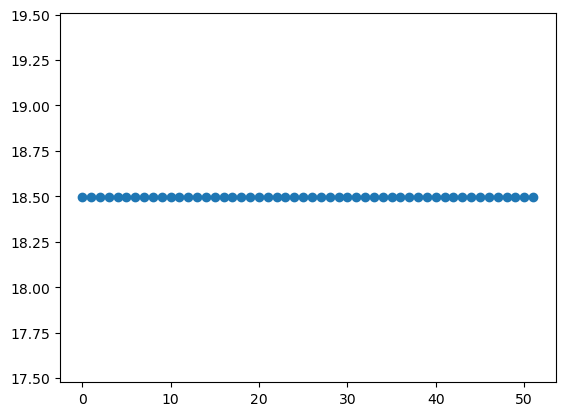

In [100]:
plt.plot(range(52), edge_state_prob,'-o')
plt.show()

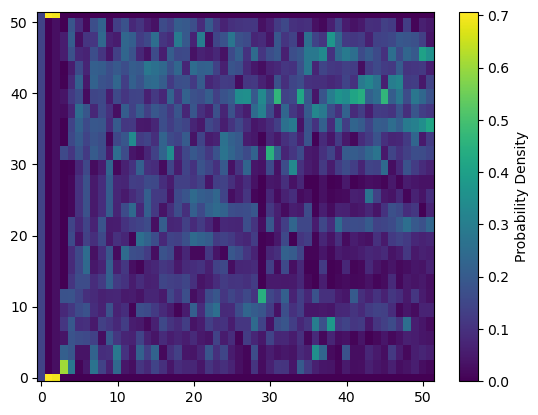

In [91]:

plt.imshow(np.abs(eigenvector[0, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

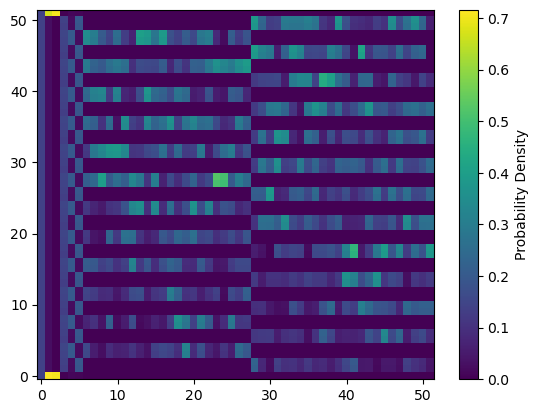

In [92]:
plt.imshow(np.abs(eigenvector[1, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')


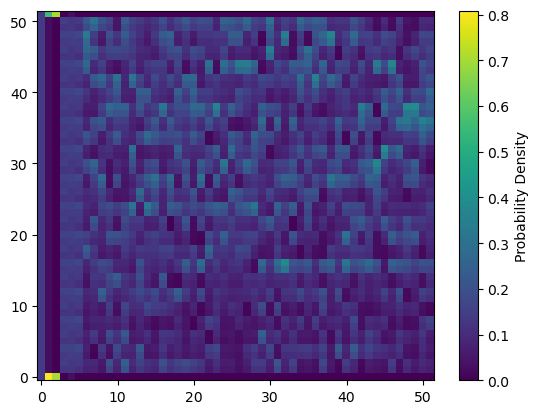

In [43]:
plt.imshow(np.abs(eigenvector[2, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

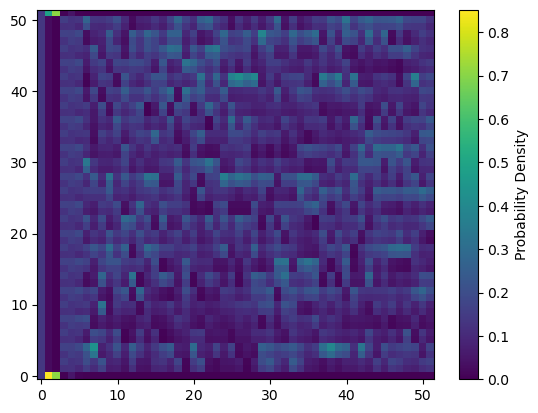

In [44]:
plt.imshow(np.abs(eigenvector[3, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

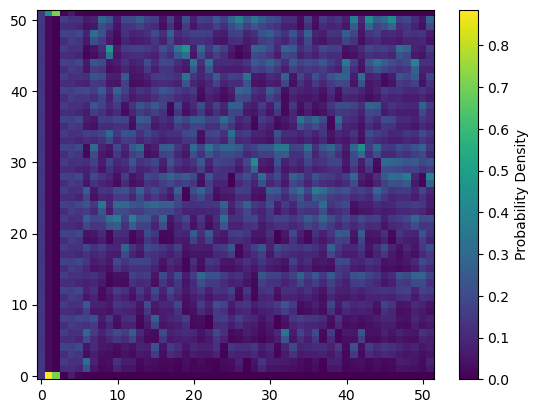

In [45]:
plt.imshow(np.abs(eigenvector[4, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

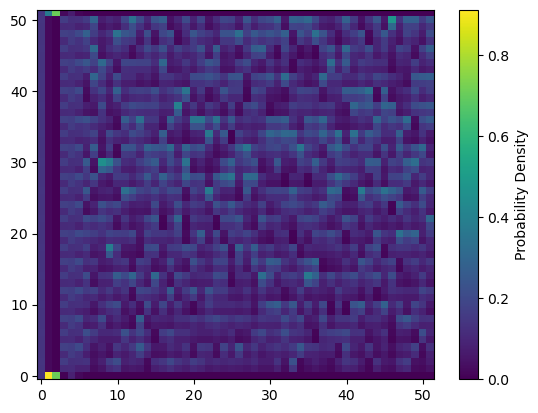

In [46]:
plt.imshow(np.abs(eigenvector[5, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

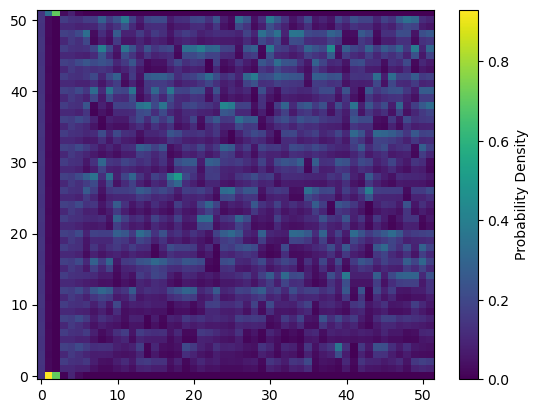

In [47]:
plt.imshow(np.abs(eigenvector[6, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

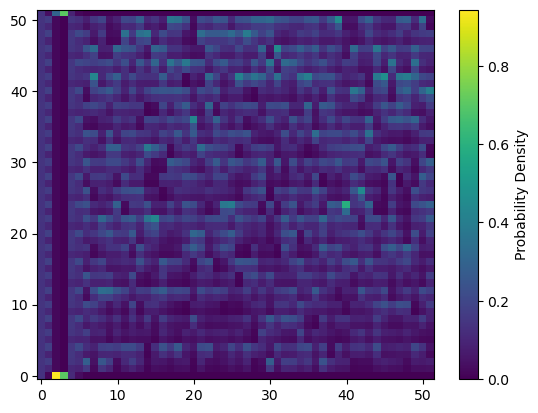

In [48]:
plt.imshow(np.abs(eigenvector[7, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

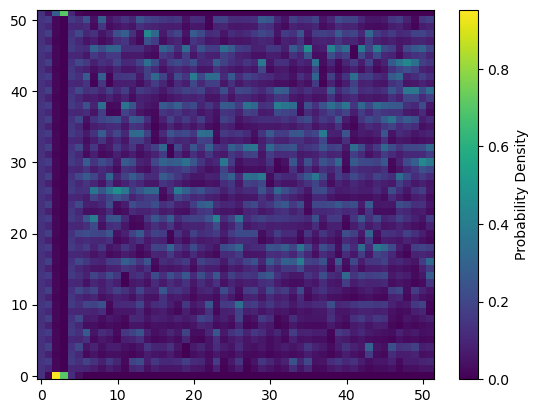

In [49]:
plt.imshow(np.abs(eigenvector[8, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

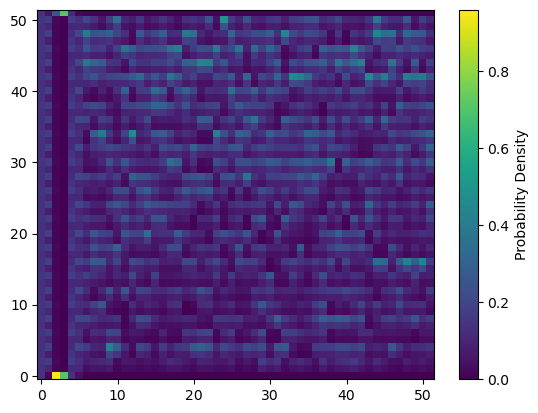

In [50]:
plt.imshow(np.abs(eigenvector[9, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

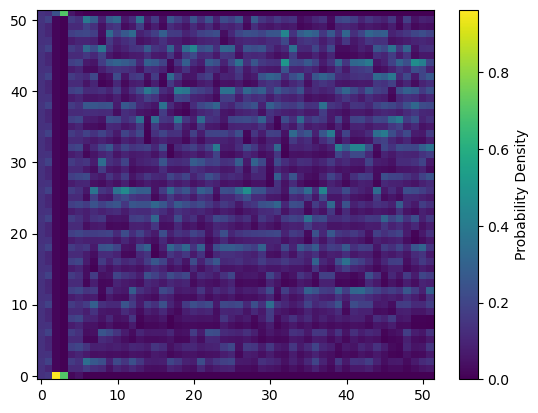

In [52]:
plt.imshow(np.abs(eigenvector[10, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

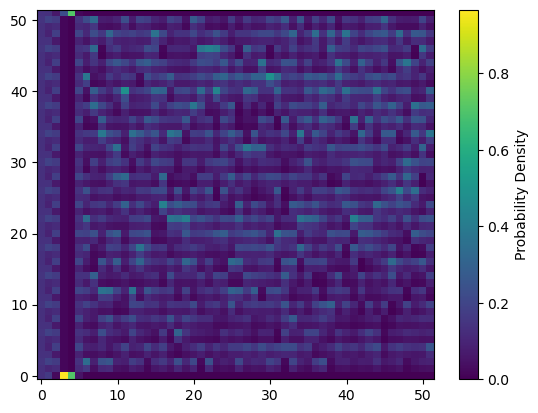

In [53]:
plt.imshow(np.abs(eigenvector[11, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

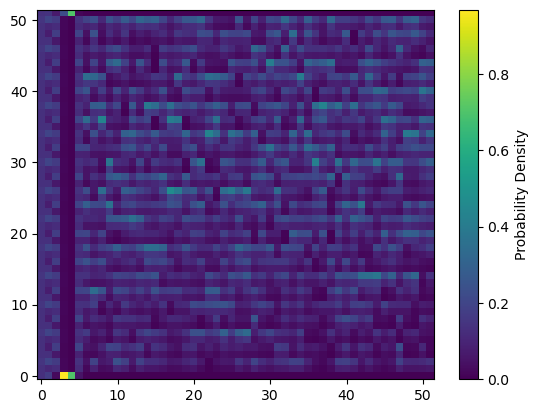

In [54]:
plt.imshow(np.abs(eigenvector[12, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

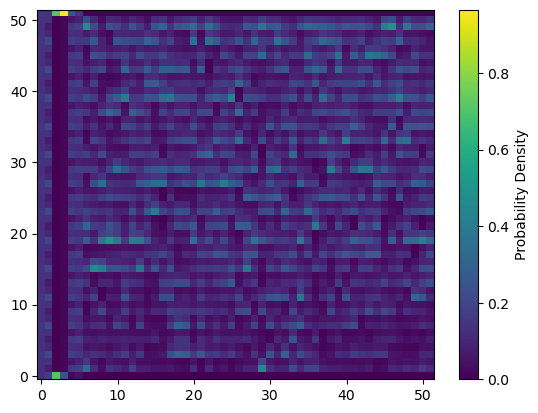

In [55]:
plt.imshow(np.abs(eigenvector[40, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

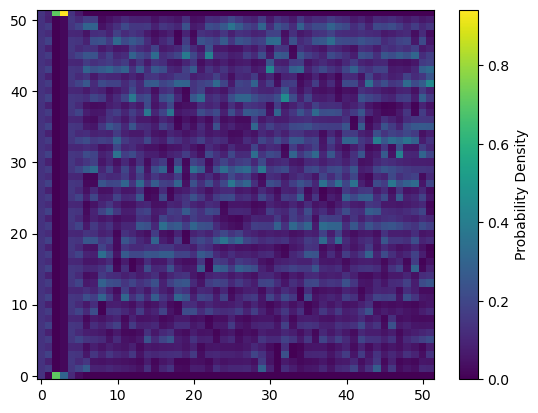

In [56]:
plt.imshow(np.abs(eigenvector[45, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

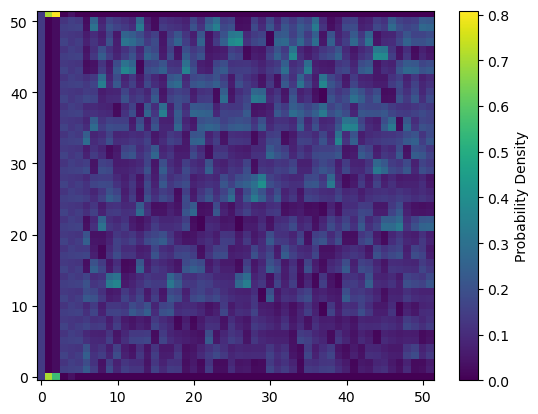

In [57]:
plt.imshow(np.abs(eigenvector[50, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

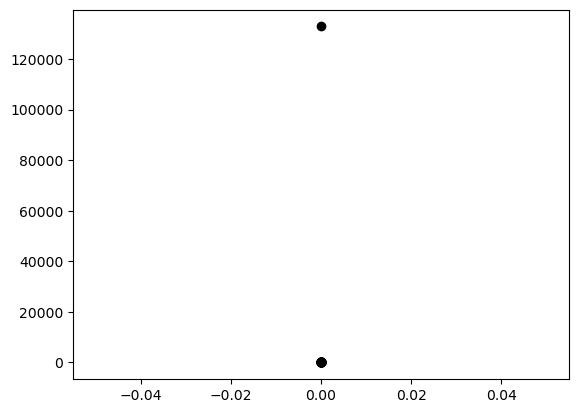

In [59]:
for i in range(Ly):
    plt.plot(np.abs(eigenvalues[i]), 'ko')